In [1]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
from hits import CyDetHits, CTHHits, CDCHits, FlatHits
from memory_profiler import memory_usage
from pprint import pprint
from collections import Counter
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define some branches to import
## Existing branches
prefix = "CDCHit.f"
drift_name = prefix + "DriftTime"
drift_dist_name = prefix + "DriftDist"
track_id_name = prefix + "Track.fTrackID"
turn_id_name = prefix + "TurnID"
pid_name = prefix + "Track.fPID"
parent_track_id_name = prefix + "Track.fParentTrackID"
all_momentum_names = [ prefix + "Track.f" + st_sp + "Momentum.f" + coor 
                       for st_sp in ["Start", "Stop"] for coor in ["X", "Y", "Z"] ]
all_pos_names = [ prefix + "Track.f" + st_sp + "PosGlobal.f" + coor 
                       for st_sp in ["Start", "Stop"] for coor in ["P.fX", "P.fY", "P.fZ", "E"] ]
hit_pos_names = [ prefix + "MCPos.f" + coor for coor in ["P.fX", "P.fY", "P.fZ", "E"] ]
hit_mom_names = [ prefix + "MCMom.f" + coor for coor in ["X", "Y", "Z"] ]
## Branches to be filled
row_name = "Layers"
cell_id_name = prefix + "CellID"
lcl_scr_name = prefix + "Local_Score"
ngh_scr_name = prefix + "Neigh_Score"
hgh_scr_name = prefix + "Hough_Score"
trk_scr_name = prefix + "Track_Score"
rel_time_name = prefix + "Relative_Time"
take_hit_name = prefix + "Take_Hit"
## Kinda both
sig_flag = "IsSig"

In [3]:
these_branches = [drift_name, 
                  track_id_name, 
                  turn_id_name, 
                  drift_dist_name,
                  pid_name,
                  parent_track_id_name] +\
                 hit_mom_names +\
                 all_momentum_names +\
                 all_pos_names +\
                 hit_pos_names
                            
empty_branches = [prefix + row_name, 
                  cell_id_name,
                  lcl_scr_name, 
                  ngh_scr_name, 
                  hgh_scr_name,
                  trk_scr_name, 
                  rel_time_name,
                  take_hit_name]

empty_branches = [prefix + row_name]

In [4]:
back_sample_root = "/vols/comet/users/elg112/ICEDUST"\
                   "/local_storage/Blessed_Outputs/"
back_sample = back_sample_root + "1_2495_cdc_back.root"
#back_sample_2 = back_sample_root + "2_3362_cdc_back.root"
#back_sample_3 = back_sample_root + "3_2500_cdc_back.root"
back_sample_2 = back_sample_root + "2_100_cdc_back_constant_drift.root"
back_sample_3 = back_sample_root + "3_100_cdc_back_constant_drift.root"

In [5]:
import hits
reload(hits)
from hits import CyDetHits

In [6]:
print empty_branches

['CDCHit.fLayers']


In [7]:
back_cdc = CyDetHits(back_sample, 
                     signal_coding=[1], 
                     row_name=row_name,
                     hit_type_name=sig_flag,
                     branches=these_branches,
                     empty_branches=empty_branches,
                     n_evts=100)

TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IDataVector is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IData is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IDatum is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ICOMETContext is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ISHAHashValue is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IAlignmentId is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent::Header is available


In [8]:
back_cdc_2 = CyDetHits(back_sample_2, 
                     signal_coding=[1], 
                     row_name=row_name,
                     hit_type_name=sig_flag,
                     branches=these_branches,
                     empty_branches=empty_branches)

In [9]:
back_cdc_3 = CyDetHits(back_sample_3, 
                     signal_coding=[1], 
                     row_name=row_name,
                     hit_type_name=sig_flag,
                     branches=these_branches,
                     empty_branches=empty_branches)

In [10]:
print memory_usage()

[746.5390625]


In [11]:
def mag_momentum(sample):
    mask = np.absolute(sample.get_events()["CDCHit.fTrack.fPID"]) != 11
    return np.sqrt(np.square(sample.get_events()["CDCHit.fTrack.fStartMomentum.fX"][mask]) +\
                   np.square(sample.get_events()["CDCHit.fTrack.fStartMomentum.fY"][mask]) +\
                   np.square(sample.get_events()["CDCHit.fTrack.fStartMomentum.fZ"][mask]))

In [12]:
def plot_times(sample):
    figsize(10, 5)
    plt.title("Background Sample Truth Hit Timing, CDCHit.fMCPos.fE")
    plt.xlabel("Truth Hit Timing, ns")
    plt.hist(sample.get_events()["CDCHit.fMCPos.fE"], bins=100)
    plt.show()
    print sample.time_name

    plt.title("Background Sample Drift Timing, CDCHit.fDriftTime")
    plt.xlabel("Drift Timing, ns")
    plt.hist(sample.get_events()["CDCHit.fDriftTime"], bins=100)
    plt.show()

    plt.title("Background Sample Detected Timing, CDCHit.fMCPos.fE + CDCHit.fDriftTime")
    plt.xlabel("Truth Hit Timing + Drift Timing, ns")
    plt.hist(sample.get_events()["CDCHit.fMCPos.fE"] + sample.get_events()["CDCHit.fDriftTime"],
             bins=100)
    plt.show()

    plt.hist(sample.get_events()[sample.time_name], bins=100)
    plt.show()

    plt.ylabel("DriftTime (ns)")
    plt.xlabel("Truth Time")
    plt.hist2d(sample.get_events()["CDCHit.fMCPos.fE"][sample.get_events()["CDCHit.fDriftTime"] < 500], 
               sample.get_events()["CDCHit.fDriftTime"][sample.get_events()["CDCHit.fDriftTime"] < 500],
               bins=200)
    plt.show()

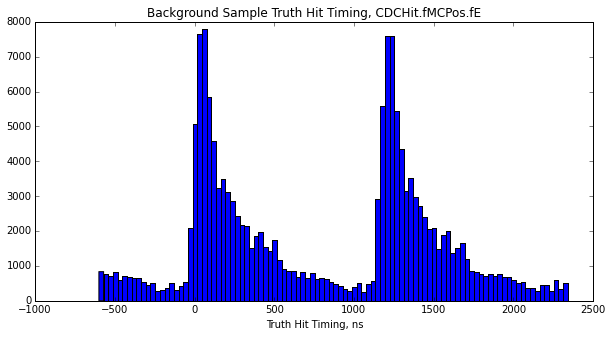

CDCHit.fDetectedTime


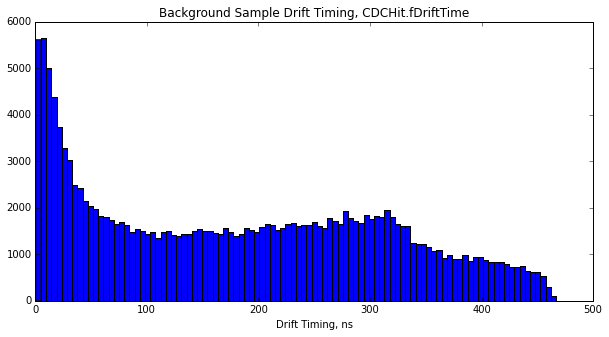

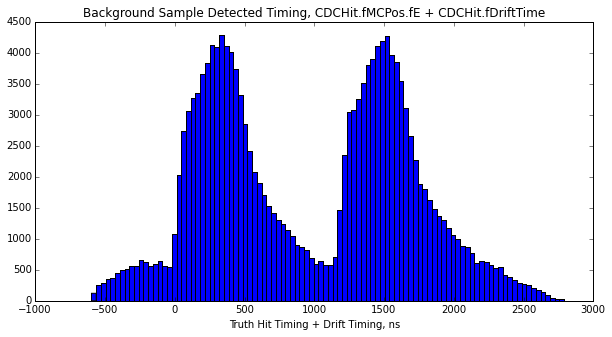

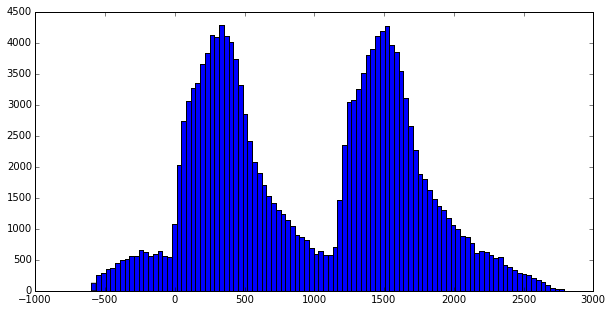

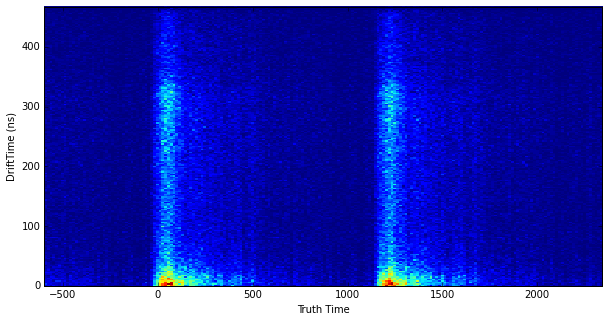

In [13]:
plot_times(back_cdc_3)

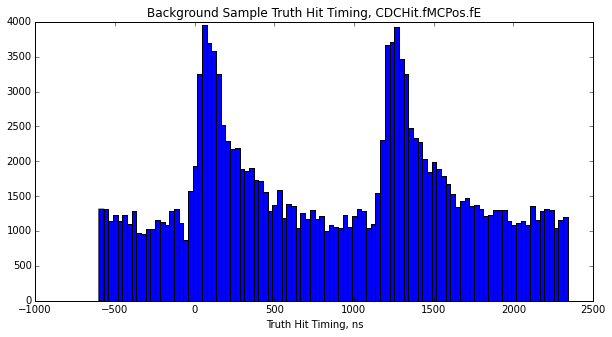

CDCHit.fDetectedTime


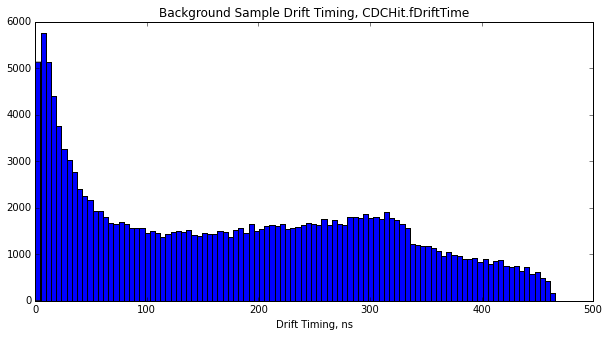

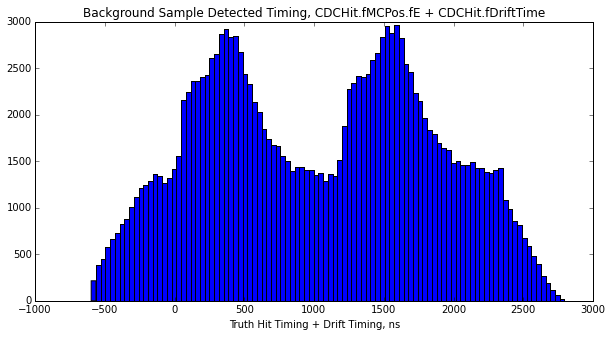

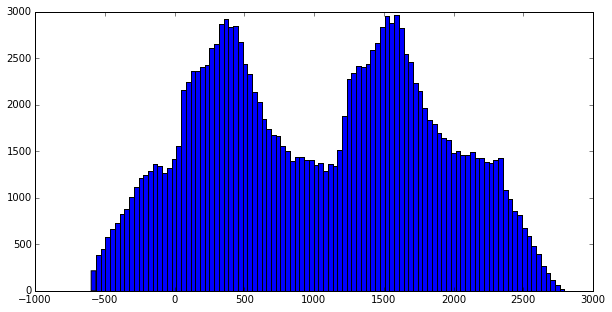

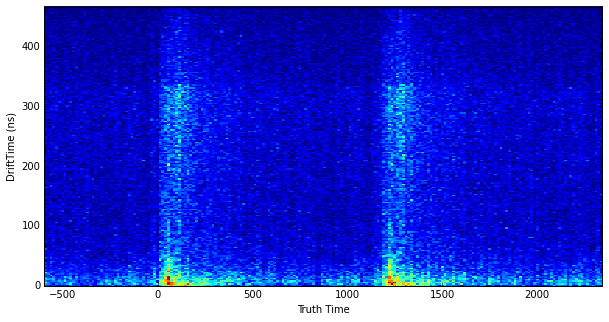

In [14]:
plot_times(back_cdc_2)

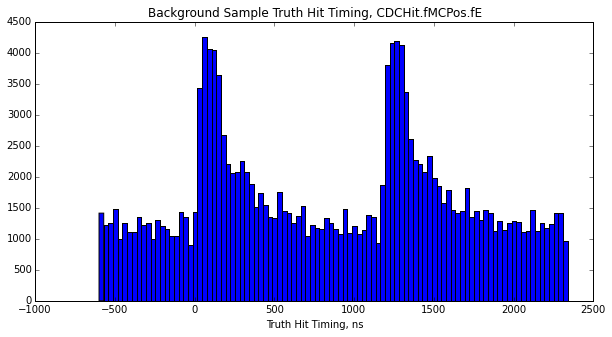

CDCHit.fDetectedTime


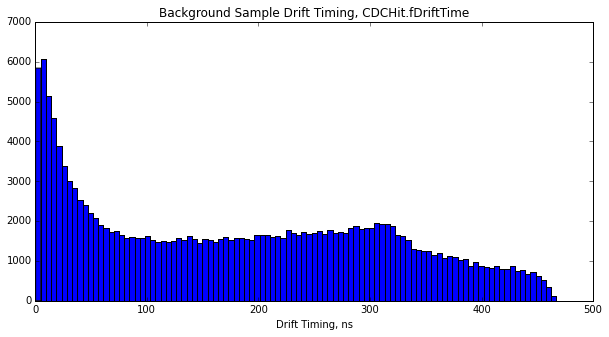

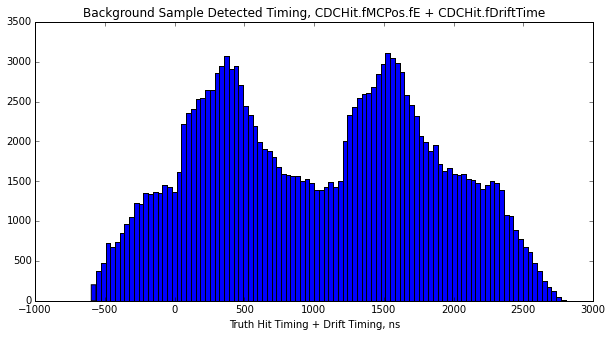

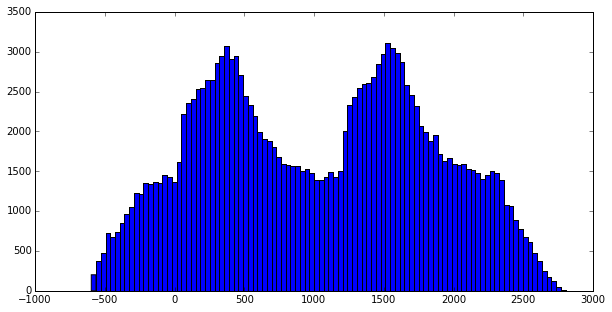

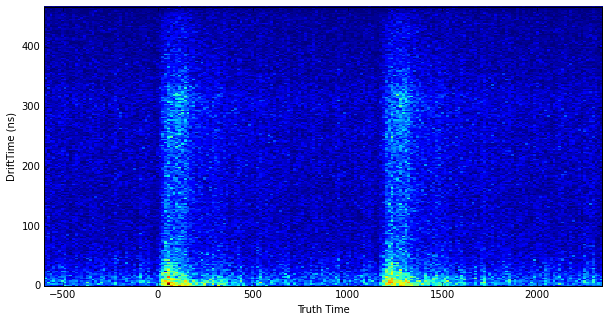

In [15]:
plot_times(back_cdc)

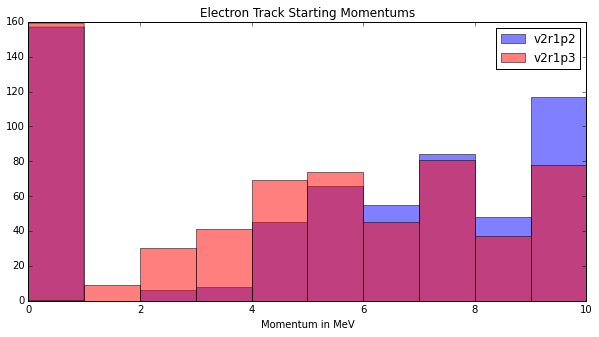

In [16]:
plt.title("Electron Track Starting Momentums")
plt.xlabel("Momentum in MeV")
plt.hist(mag_momentum(back_cdc_2), bins=10, range=(0,10), color="b", alpha=0.5, label="v2r1p2")
plt.hist(mag_momentum(back_cdc_3), bins=10, range=(0,10), color="r", alpha=0.5,  label="v2r1p3")
plt.legend()
plt.show()

[  1.47775128e-01   2.34803507e+01   4.68129262e+01   7.01455017e+01
   9.34780773e+01   1.16810653e+02   1.40143228e+02   1.63475804e+02
   1.86808379e+02   2.10140955e+02   2.33473531e+02   2.56806106e+02
   2.80138682e+02   3.03471257e+02   3.26803833e+02   3.50136408e+02
   3.73468984e+02   3.96801559e+02   4.20134135e+02   4.43466710e+02]
CDCHit.fDriftTime


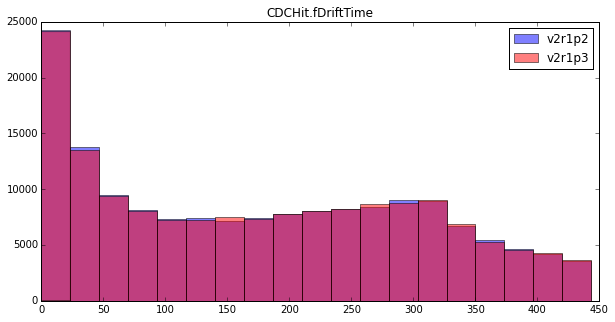

[    0.     109.75   219.5    329.25   439.     548.75   658.5    768.25
   878.     987.75  1097.5   1207.25  1317.    1426.75  1536.5   1646.25
  1756.    1865.75  1975.5   2085.25]
CDCHit.fTrack.fTrackID


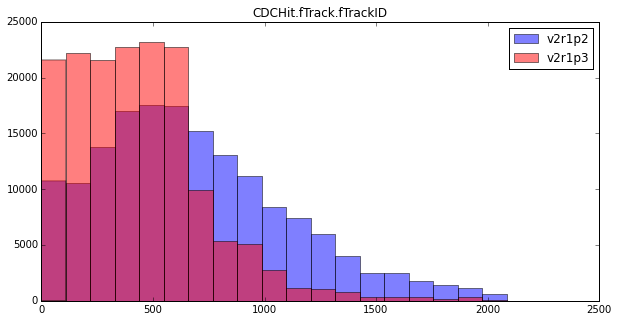

[  0.    1.3   2.6   3.9   5.2   6.5   7.8   9.1  10.4  11.7  13.   14.3
  15.6  16.9  18.2  19.5  20.8  22.1  23.4  24.7]
CDCHit.fTurnID


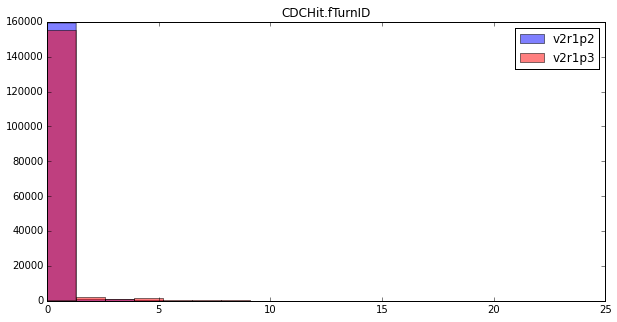

[  3.69437831e-03   5.87008757e-01   1.17032314e+00   1.75363752e+00
   2.33695189e+00   2.92026627e+00   3.50358065e+00   4.08689503e+00
   4.67020941e+00   5.25352379e+00   5.83683817e+00   6.42015255e+00
   7.00346693e+00   7.58678130e+00   8.17009568e+00   8.75341006e+00
   9.33672444e+00   9.92003882e+00   1.05033532e+01   1.10866676e+01]
CDCHit.fDriftDist


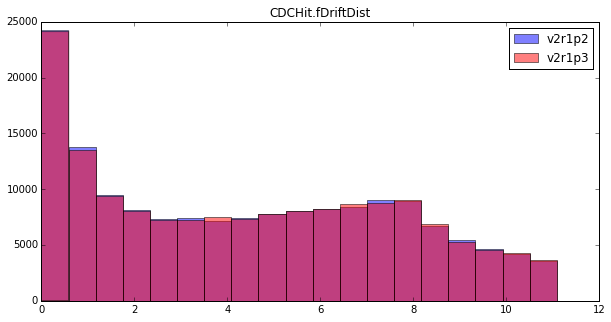

[ -2.11000000e+02   5.00008015e+07   1.00001814e+08   1.50002827e+08
   2.00003839e+08   2.50004852e+08   3.00005864e+08   3.50006877e+08
   4.00007889e+08   4.50008902e+08   5.00009914e+08   5.50010927e+08
   6.00011940e+08   6.50012952e+08   7.00013965e+08   7.50014977e+08
   8.00015990e+08   8.50017002e+08   9.00018015e+08   9.50019027e+08]
CDCHit.fTrack.fPID


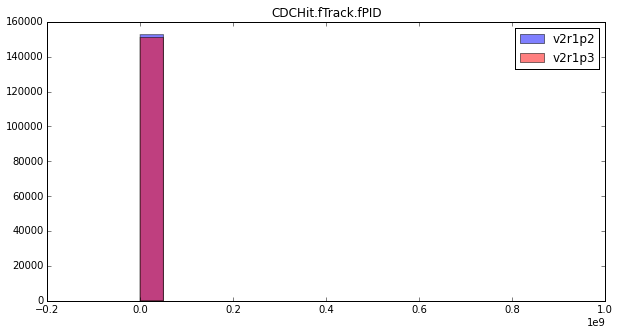

[    0.    109.7   219.4   329.1   438.8   548.5   658.2   767.9   877.6
   987.3  1097.   1206.7  1316.4  1426.1  1535.8  1645.5  1755.2  1864.9
  1974.6  2084.3]
CDCHit.fTrack.fParentTrackID


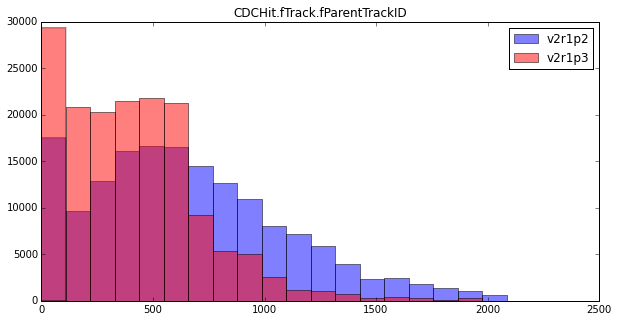

[-356.37338257 -321.42750549 -286.48162842 -251.53575134 -216.58987427
 -181.64399719 -146.69812012 -111.75224304  -76.80636597  -41.86048889
   -6.91461182   28.03126526   62.97714233   97.92301941  132.86889648
  167.81477356  202.76065063  237.70652771  272.65240479  307.59828186]
CDCHit.fMCMom.fX


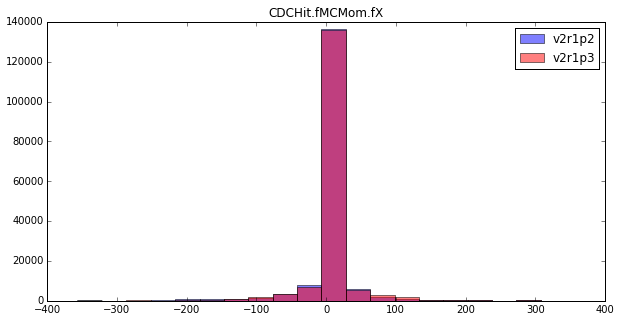

[-416.90783691 -374.54749908 -332.18716125 -289.82682343 -247.4664856
 -205.10614777 -162.74580994 -120.38547211  -78.02513428  -35.66479645
    6.69554138   49.05587921   91.41621704  133.77655487  176.1368927
  218.49723053  260.85756836  303.21790619  345.57824402  387.93858185]
CDCHit.fMCMom.fY


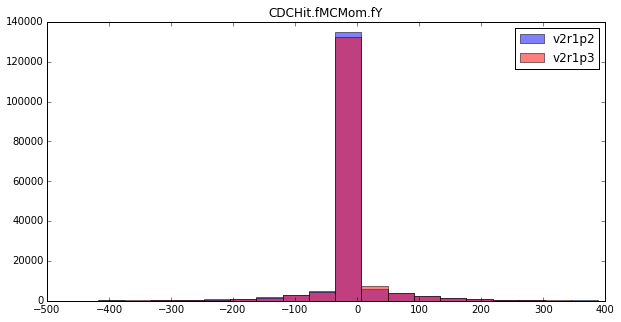

[-437.54437256 -392.37479401 -347.20521545 -302.0356369  -256.86605835
 -211.6964798  -166.52690125 -121.35732269  -76.18774414  -31.01816559
   14.15141296   59.32099152  104.49057007  149.66014862  194.82972717
  239.99930573  285.16888428  330.33846283  375.50804138  420.67761993]
CDCHit.fMCMom.fZ


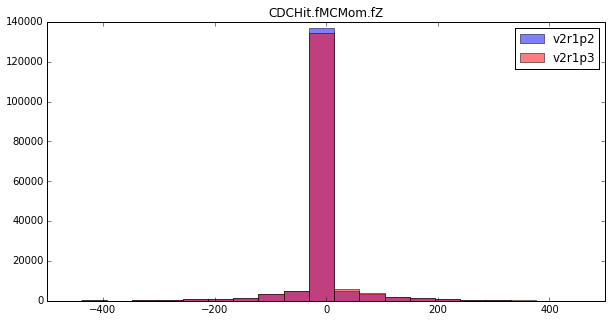

[-382.3265686  -341.90883484 -301.49110107 -261.07336731 -220.65563354
 -180.23789978 -139.82016602  -99.40243225  -58.98469849  -18.56696472
   21.85076904   62.26850281  102.68623657  143.10397034  183.5217041
  223.93943787  264.35717163  304.7749054   345.19263916  385.61037292]
CDCHit.fTrack.fStartMomentum.fX


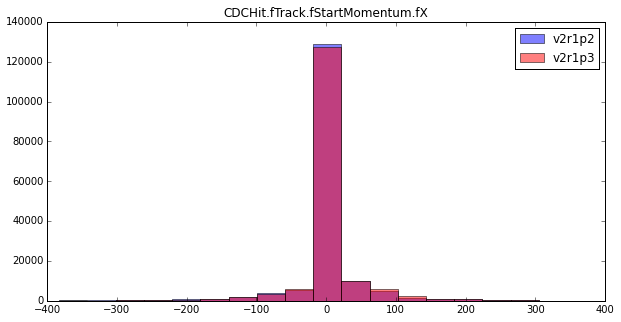

[-449.49069214 -397.98568573 -346.48067932 -294.97567291 -243.4706665
 -191.9656601  -140.46065369  -88.95564728  -37.45064087   14.05436554
   65.55937195  117.06437836  168.56938477  220.07439117  271.57939758
  323.08440399  374.5894104   426.09441681  477.59942322  529.10442963]
CDCHit.fTrack.fStartMomentum.fY


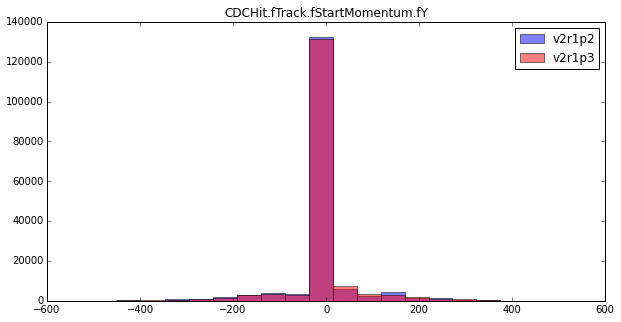

[-441.36108398 -400.11894531 -358.87680664 -317.63466797 -276.3925293
 -235.15039062 -193.90825195 -152.66611328 -111.42397461  -70.18183594
  -28.93969727   12.30244141   53.54458008   94.78671875  136.02885742
  177.27099609  218.51313477  259.75527344  300.99741211  342.23955078]
CDCHit.fTrack.fStartMomentum.fZ


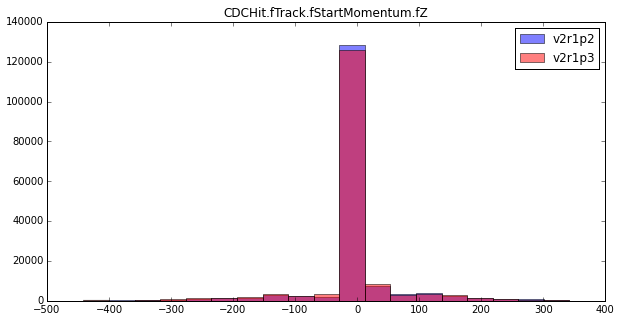

[-185.00175476 -170.53988762 -156.07802048 -141.61615334 -127.15428619
 -112.69241905  -98.23055191  -83.76868477  -69.30681763  -54.84495049
  -40.38308334  -25.9212162   -11.45934906    3.00251808   17.46438522
   31.92625237   46.38811951   60.84998665   75.31185379   89.77372093]
CDCHit.fTrack.fStopMomentum.fX


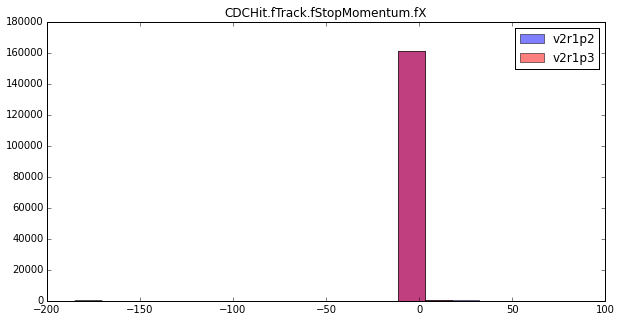

[ -3.14950500e+02  -2.92452277e+02  -2.69954053e+02  -2.47455829e+02
  -2.24957605e+02  -2.02459381e+02  -1.79961157e+02  -1.57462933e+02
  -1.34964709e+02  -1.12466486e+02  -8.99682617e+01  -6.74700378e+01
  -4.49718140e+01  -2.24735901e+01   2.46337891e-02   2.25228577e+01
   4.50210815e+01   6.75193054e+01   9.00175293e+01   1.12515753e+02]
CDCHit.fTrack.fStopMomentum.fY


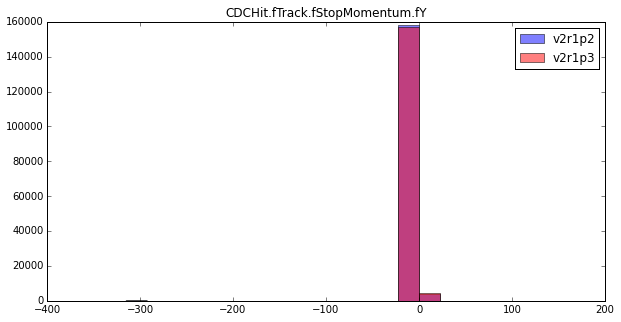

[-240.56736755 -215.09702682 -189.6266861  -164.15634537 -138.68600464
 -113.21566391  -87.74532318  -62.27498245  -36.80464172  -11.33430099
   14.13603973   39.60638046   65.07672119   90.54706192  116.01740265
  141.48774338  166.95808411  192.42842484  217.89876556  243.36910629]
CDCHit.fTrack.fStopMomentum.fZ


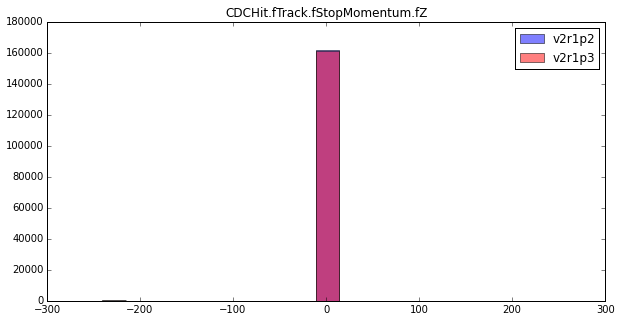

[  1208.29162598   1789.07650757   2369.86138916   2950.64627075
   3531.43115234   4112.21603394   4693.00091553   5273.78579712
   5854.57067871   6435.3555603    7016.14044189   7596.92532349
   8177.71020508   8758.49508667   9339.27996826   9920.06484985
  10500.84973145  11081.63461304  11662.41949463  12243.20437622]
CDCHit.fTrack.fStartPosGlobal.fP.fX


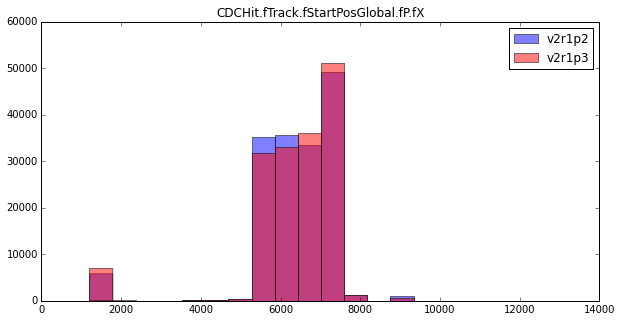

[-1456.86767578 -1274.19720459 -1091.5267334   -908.85626221  -726.18579102
  -543.51531982  -360.84484863  -178.17437744     4.49609375   187.16656494
   369.83703613   552.50750732   735.17797852   917.84844971  1100.5189209
  1283.18939209  1465.85986328  1648.53033447  1831.20080566  2013.87127686]
CDCHit.fTrack.fStartPosGlobal.fP.fY


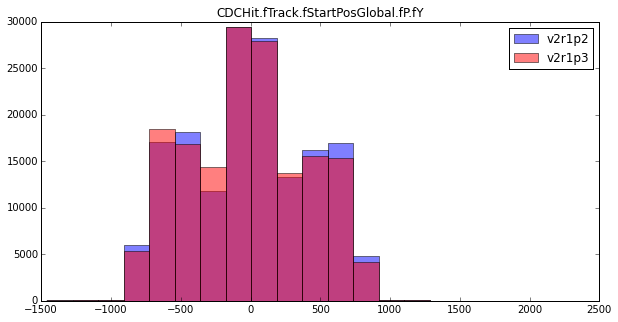

[ 6146.91113281  6292.83803711  6438.76494141  6584.6918457   6730.61875
  6876.5456543   7022.47255859  7168.39946289  7314.32636719  7460.25327148
  7606.18017578  7752.10708008  7898.03398438  8043.96088867  8189.88779297
  8335.81469727  8481.74160156  8627.66850586  8773.59541016  8919.52231445]
CDCHit.fTrack.fStartPosGlobal.fP.fZ


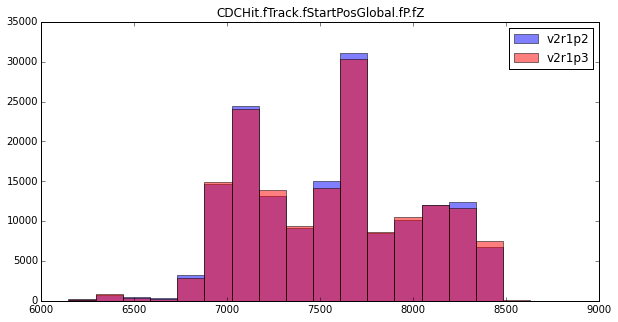

[  -41.71221542   311.33555355   664.38332253  1017.4310915   1370.47886047
  1723.52662945  2076.57439842  2429.6221674   2782.66993637  3135.71770535
  3488.76547432  3841.81324329  4194.86101227  4547.90878124  4900.95655022
  5254.00431919  5607.05208817  5960.09985714  6313.14762611  6666.19539509]
CDCHit.fTrack.fStartPosGlobal.fE


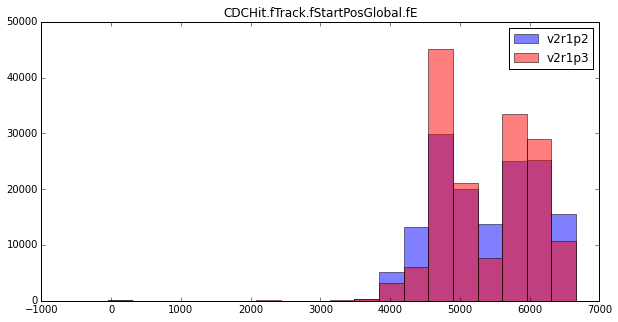

[  1475.75817871   2280.61782837   3085.47747803   3890.33712769
   4695.19677734   5500.056427     6304.91607666   7109.77572632
   7914.63537598   8719.49502563   9524.35467529  10329.21432495
  11134.07397461  11938.93362427  12743.79327393  13548.65292358
  14353.51257324  15158.3722229   15963.23187256  16768.09152222]
CDCHit.fTrack.fStopPosGlobal.fP.fX


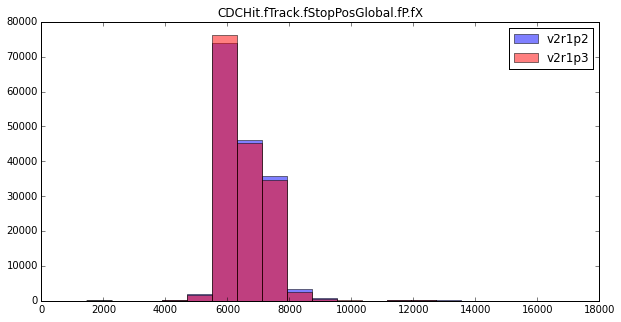

[-2332.02246094 -2112.64379883 -1893.26513672 -1673.88647461 -1454.5078125
 -1235.12915039 -1015.75048828  -796.37182617  -576.99316406  -357.61450195
  -138.23583984    81.14282227   300.52148438   519.90014648   739.27880859
   958.6574707   1178.03613281  1397.41479492  1616.79345703  1836.17211914]
CDCHit.fTrack.fStopPosGlobal.fP.fY


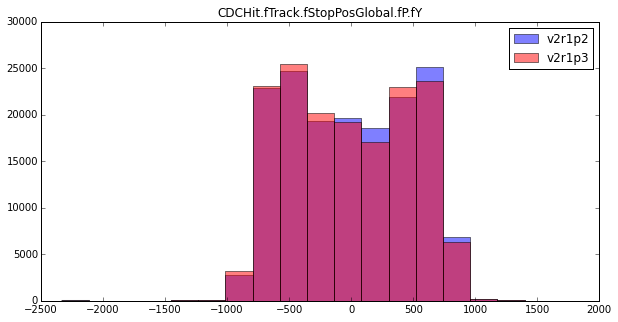

[ -3010.16064453  -2322.30881348  -1634.45698242   -946.60515137
   -258.75332031    429.09851074   1116.9503418    1804.80217285
   2492.65400391   3180.50583496   3868.35766602   4556.20949707
   5244.06132812   5931.91315918   6619.76499023   7307.61682129
   7995.46865234   8683.3204834    9371.17231445  10059.02414551]
CDCHit.fTrack.fStopPosGlobal.fP.fZ


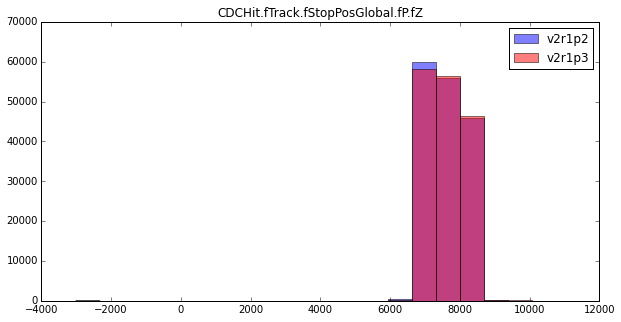

[   38.07591629   388.91606579   739.75621529  1090.59636478  1441.43651428
  1792.27666378  2143.11681328  2493.95696278  2844.79711227  3195.63726177
  3546.47741127  3897.31756077  4248.15771027  4598.99785976  4949.83800926
  5300.67815876  5651.51830826  6002.35845776  6353.19860725  6704.03875675]
CDCHit.fTrack.fStopPosGlobal.fE


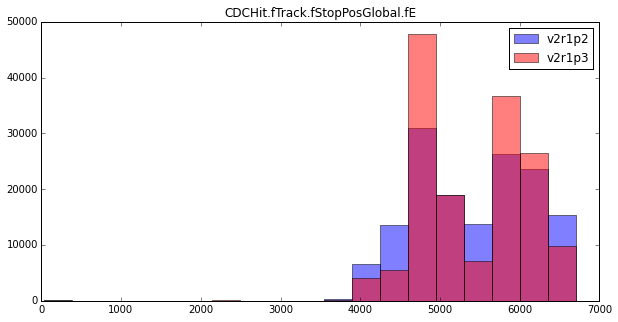

[ 5622.59886279  5701.33922657  5780.07959035  5858.81995414  5937.56031792
  6016.3006817   6095.04104548  6173.78140927  6252.52177305  6331.26213683
  6410.00250062  6488.7428644   6567.48322818  6646.22359196  6724.96395575
  6803.70431953  6882.44468331  6961.1850471   7039.92541088  7118.66577466]
CDCHit.fMCPos.fP.fX


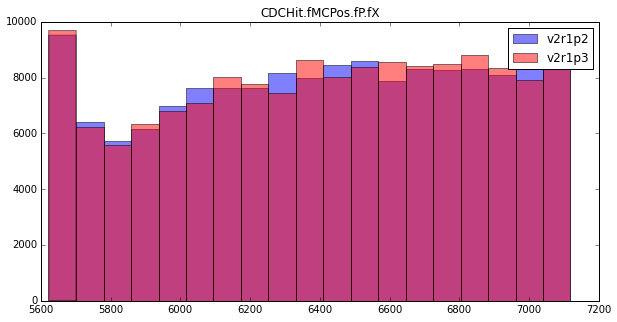

[ -8.08432864e+02  -7.27566008e+02  -6.46699152e+02  -5.65832297e+02
  -4.84965441e+02  -4.04098585e+02  -3.23231729e+02  -2.42364873e+02
  -1.61498018e+02  -8.06311619e+01   2.35693837e-01   8.11025496e+01
   1.61969405e+02   2.42836261e+02   3.23703117e+02   4.04569973e+02
   4.85436828e+02   5.66303684e+02   6.47170540e+02   7.28037396e+02]
CDCHit.fMCPos.fP.fY


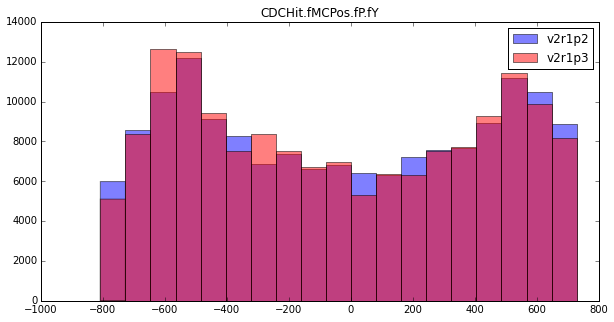

[ 6840.51565583  6921.4623234   7002.40899097  7083.35565853  7164.3023261
  7245.24899367  7326.19566123  7407.1423288   7488.08899637  7569.03566393
  7649.9823315   7730.92899907  7811.87566664  7892.8223342   7973.76900177
  8054.71566934  8135.6623369   8216.60900447  8297.55567204  8378.5023396 ]
CDCHit.fMCPos.fP.fZ


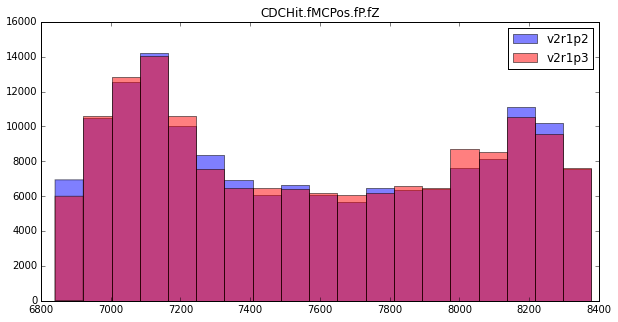

[ -600.  -453.  -306.  -159.   -12.   135.   282.   429.   576.   723.
   870.  1017.  1164.  1311.  1458.  1605.  1752.  1899.  2046.  2193.]
CDCHit.fMCPos.fE


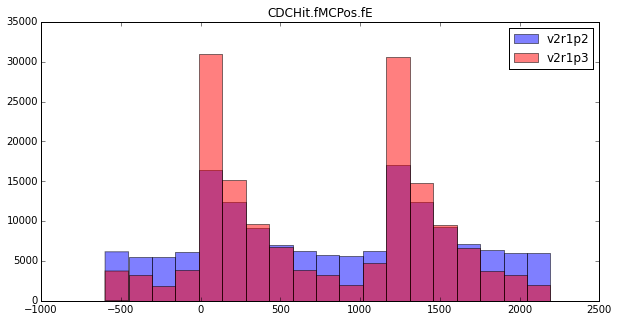

[  1.     5.95  10.9   15.85  20.8   25.75  30.7   35.65  40.6   45.55
  50.5   55.45  60.4   65.35  70.3   75.25  80.2   85.15  90.1   95.05]
CDCHit.fEventNumber


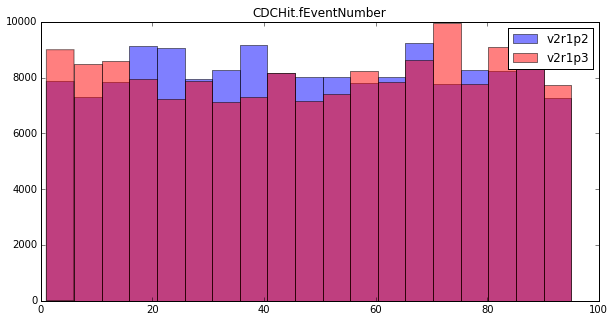

[      0.     8116.4   16232.8   24349.2   32465.6   40582.    48698.4
   56814.8   64931.2   73047.6   81164.    89280.4   97396.8  105513.2
  113629.6  121746.   129862.4  137978.8  146095.2  154211.6]
CDCHit.fhits_index


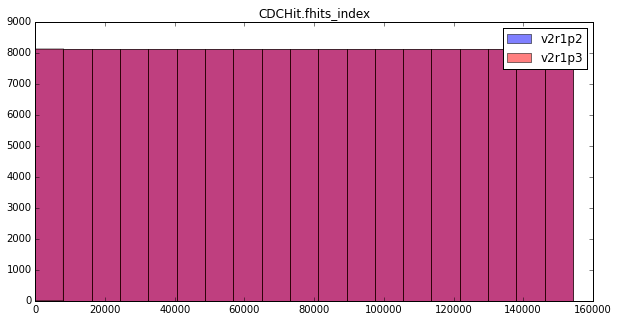

[  0.     4.95   9.9   14.85  19.8   24.75  29.7   34.65  39.6   44.55
  49.5   54.45  59.4   64.35  69.3   74.25  79.2   84.15  89.1   94.05]
CDCHit.fevent_index


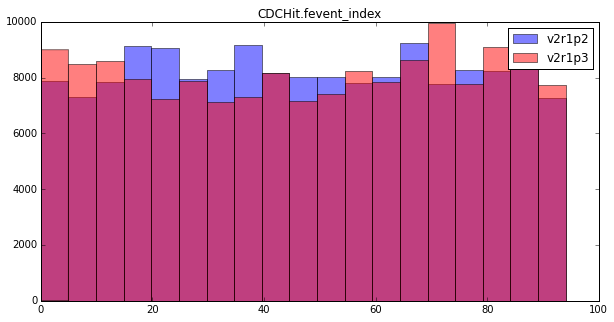

/home/hep/elg112/software/python/virtual_envs/rep/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


[]
CDCHit.fIsSig
[]
CDCHit.fLayers
[]
CDCHit.fTrigTime
[    0.     224.05   448.1    672.15   896.2   1120.25  1344.3   1568.35
  1792.4   2016.45  2240.5   2464.55  2688.6   2912.65  3136.7   3360.75
  3584.8   3808.85  4032.9   4256.95]
CDCHit.fvol_id


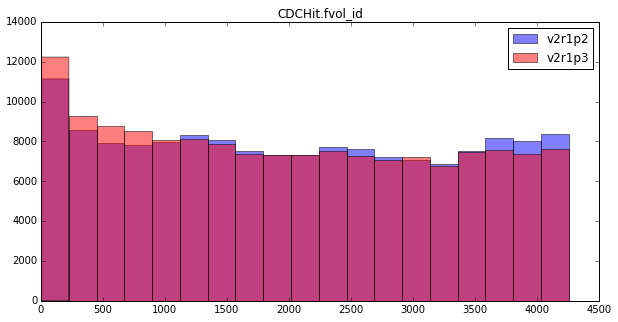

[  1.00000000e+00   4.47760000e+03   8.95420000e+03   1.34308000e+04
   1.79074000e+04   2.23840000e+04   2.68606000e+04   3.13372000e+04
   3.58138000e+04   4.02904000e+04   4.47670000e+04   4.92436000e+04
   5.37202000e+04   5.81968000e+04   6.26734000e+04   6.71500000e+04
   7.16266000e+04   7.61032000e+04   8.05798000e+04   8.50564000e+04]
CDCHit.fCharge


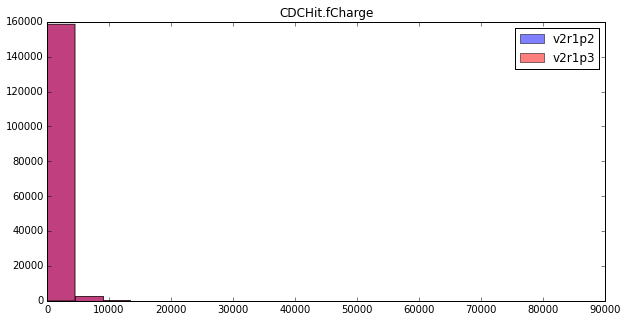

[ -597.8569026   -428.21746628  -258.57802997   -88.93859365    80.70084267
   250.34027898   419.9797153    589.61915162   759.25858793   928.89802425
  1098.53746057  1268.17689688  1437.8163332   1607.45576952  1777.09520583
  1946.73464215  2116.37407846  2286.01351478  2455.6529511   2625.29238741]
CDCHit.fDetectedTime


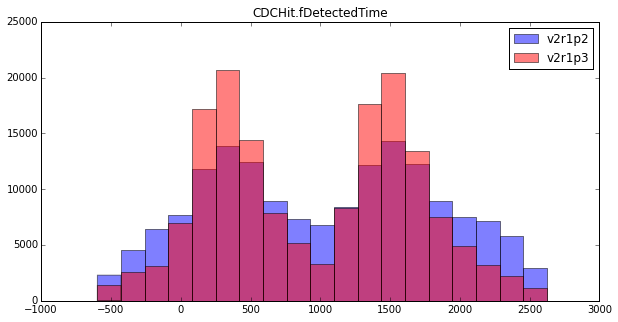

In [17]:
for branch in back_cdc.data.dtype.names:
    min_bin = np.amin(np.append(back_cdc_2.get_events()[branch], back_cdc_3.get_events()[branch]))
    max_bin = np.amax(np.append(back_cdc_2.get_events()[branch], back_cdc_3.get_events()[branch]))
    bins = np.arange(min_bin, max_bin, (max_bin - min_bin)/20.)
    print bins
    print branch
    if branch in empty_branches:
        continue
    plt.title(branch)
    plt.hist(back_cdc_2.get_events()[branch], color="b", alpha=0.5, label="v2r1p2", bins=bins)
    plt.hist(back_cdc_3.get_events()[branch], color="r", alpha=0.5,  label="v2r1p3",  bins=bins)
    plt.legend()
    plt.show()